<a href="https://colab.research.google.com/github/suman-rm/HealthCare-Disease-prediction-using-ML/blob/main/PySpark.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# HEALTH CARE - DISEASE PREDICTION OF PATIENT’S USING ML MODEL

PySpark is the Python API for Apache Spark, an open source, distributed computing framework and set of libraries for real-time, large-scale data processing.The key data type used in PySpark is the Spark dataframe. This object can be thought of as a table distributed across a cluster, and has functionality that is similar to dataframes in R and Pandas. 

In [2]:
#installing pyspark library
!pip install pyspark

     |████████████████████████████████| 281.4 MB 34 kB/s 
     |████████████████████████████████| 198 kB 60.6 MB/s 
  Created wheel for pyspark: filename=pyspark-3.2.1-py2.py3-none-any.whl size=281853642 sha256=7b29edeeff3b23f50741a533eba28824b0ced3c304df50d3fefe3b8c82b92d19
  Stored in directory: /root/.cache/pip/wheels/9f/f5/07/7cd8017084dce4e93e84e92efd1e1d5334db05f2e83bcef74f
Successfully built pyspark


In [3]:
#importing pyspark library
import pyspark

In [4]:
#starting spark session
from pyspark.sql import SparkSession

In [5]:
#setting application name as HealthCare
spark=SparkSession.builder.appName('HealthCare').getOrCreate()

In [6]:
spark

In [ ]:
#connecting google colab with google drive
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [7]:
#reading dataset Training.csv with respect to spark
df= spark.read.csv("/content/drive/MyDrive/Colab Notebooks/Training.csv",header=True,inferSchema=True)


In [ ]:
df

DataFrame[itching: int, skin_rash: int, nodal_skin_eruptions: int, continuous_sneezing: int, shivering: int, chills: int, joint_pain: int, stomach_pain: int, acidity: int, ulcers_on_tongue: int, muscle_wasting: int, vomiting: int, burning_micturition: int, spotting_ urination: int, fatigue: int, weight_gain: int, anxiety: int, cold_hands_and_feets: int, mood_swings: int, weight_loss: int, restlessness: int, lethargy: int, patches_in_throat: int, irregular_sugar_level: int, cough: int, high_fever: int, sunken_eyes: int, breathlessness: int, sweating: int, dehydration: int, indigestion: int, headache: int, yellowish_skin: int, dark_urine: int, nausea: int, loss_of_appetite: int, pain_behind_the_eyes: int, back_pain: int, constipation: int, abdominal_pain: int, diarrhoea: int, mild_fever: int, yellow_urine: int, yellowing_of_eyes: int, acute_liver_failure: int, fluid_overload45: int, swelling_of_stomach: int, swelled_lymph_nodes: int, malaise: int, blurred_and_distorted_vision: int, phleg

In [ ]:
#displaying first 20 rows of the dataset
df.show()

+-------+---------+--------------------+-------------------+---------+------+----------+------------+-------+----------------+--------------+--------+-------------------+-------------------+-------+-----------+-------+--------------------+-----------+-----------+------------+--------+-----------------+---------------------+-----+----------+-----------+--------------+--------+-----------+-----------+--------+--------------+----------+------+----------------+--------------------+---------+------------+--------------+---------+----------+------------+-----------------+-------------------+----------------+-------------------+-------------------+-------+----------------------------+------+-----------------+---------------+--------------+----------+----------+----------+-----------------+---------------+---------------------------+-------------------+------------+------------------+---------+---------+------+--------+-------+------------+---------------------+-------------------+------------

In [ ]:
#printSchema is used to check datatype of the columns
df.printSchema()

root
 |-- itching: integer (nullable = true)
 |-- skin_rash: integer (nullable = true)
 |-- nodal_skin_eruptions: integer (nullable = true)
 |-- continuous_sneezing: integer (nullable = true)
 |-- shivering: integer (nullable = true)
 |-- chills: integer (nullable = true)
 |-- joint_pain: integer (nullable = true)
 |-- stomach_pain: integer (nullable = true)
 |-- acidity: integer (nullable = true)
 |-- ulcers_on_tongue: integer (nullable = true)
 |-- muscle_wasting: integer (nullable = true)
 |-- vomiting: integer (nullable = true)
 |-- burning_micturition: integer (nullable = true)
 |-- spotting_ urination: integer (nullable = true)
 |-- fatigue: integer (nullable = true)
 |-- weight_gain: integer (nullable = true)
 |-- anxiety: integer (nullable = true)
 |-- cold_hands_and_feets: integer (nullable = true)
 |-- mood_swings: integer (nullable = true)
 |-- weight_loss: integer (nullable = true)
 |-- restlessness: integer (nullable = true)
 |-- lethargy: integer (nullable = true)
 |-- pa

In [ ]:
#displays the type of df
type(df)

pyspark.sql.dataframe.DataFrame

In [ ]:
#getting columns name
df.columns

['itching',
 'skin_rash',
 'nodal_skin_eruptions',
 'continuous_sneezing',
 'shivering',
 'chills',
 'joint_pain',
 'stomach_pain',
 'acidity',
 'ulcers_on_tongue',
 'muscle_wasting',
 'vomiting',
 'burning_micturition',
 'spotting_ urination',
 'fatigue',
 'weight_gain',
 'anxiety',
 'cold_hands_and_feets',
 'mood_swings',
 'weight_loss',
 'restlessness',
 'lethargy',
 'patches_in_throat',
 'irregular_sugar_level',
 'cough',
 'high_fever',
 'sunken_eyes',
 'breathlessness',
 'sweating',
 'dehydration',
 'indigestion',
 'headache',
 'yellowish_skin',
 'dark_urine',
 'nausea',
 'loss_of_appetite',
 'pain_behind_the_eyes',
 'back_pain',
 'constipation',
 'abdominal_pain',
 'diarrhoea',
 'mild_fever',
 'yellow_urine',
 'yellowing_of_eyes',
 'acute_liver_failure',
 'fluid_overload45',
 'swelling_of_stomach',
 'swelled_lymph_nodes',
 'malaise',
 'blurred_and_distorted_vision',
 'phlegm',
 'throat_irritation',
 'redness_of_eyes',
 'sinus_pressure',
 'runny_nose',
 'congestion',
 'chest_pain'

In [ ]:
#getting first 5 rows of the dataset
df.head(5)

[Row(itching=1, skin_rash=1, nodal_skin_eruptions=1, continuous_sneezing=0, shivering=0, chills=0, joint_pain=0, stomach_pain=0, acidity=0, ulcers_on_tongue=0, muscle_wasting=0, vomiting=0, burning_micturition=0, spotting_ urination=0, fatigue=0, weight_gain=0, anxiety=0, cold_hands_and_feets=0, mood_swings=0, weight_loss=0, restlessness=0, lethargy=0, patches_in_throat=0, irregular_sugar_level=0, cough=0, high_fever=0, sunken_eyes=0, breathlessness=0, sweating=0, dehydration=0, indigestion=0, headache=0, yellowish_skin=0, dark_urine=0, nausea=0, loss_of_appetite=0, pain_behind_the_eyes=0, back_pain=0, constipation=0, abdominal_pain=0, diarrhoea=0, mild_fever=0, yellow_urine=0, yellowing_of_eyes=0, acute_liver_failure=0, fluid_overload45=0, swelling_of_stomach=0, swelled_lymph_nodes=0, malaise=0, blurred_and_distorted_vision=0, phlegm=0, throat_irritation=0, redness_of_eyes=0, sinus_pressure=0, runny_nose=0, congestion=0, chest_pain=0, weakness_in_limbs=0, fast_heart_rate=0, pain_durin

In [ ]:
#displays datatype of the columns
df.dtypes

[('itching', 'int'),
 ('skin_rash', 'int'),
 ('nodal_skin_eruptions', 'int'),
 ('continuous_sneezing', 'int'),
 ('shivering', 'int'),
 ('chills', 'int'),
 ('joint_pain', 'int'),
 ('stomach_pain', 'int'),
 ('acidity', 'int'),
 ('ulcers_on_tongue', 'int'),
 ('muscle_wasting', 'int'),
 ('vomiting', 'int'),
 ('burning_micturition', 'int'),
 ('spotting_ urination', 'int'),
 ('fatigue', 'int'),
 ('weight_gain', 'int'),
 ('anxiety', 'int'),
 ('cold_hands_and_feets', 'int'),
 ('mood_swings', 'int'),
 ('weight_loss', 'int'),
 ('restlessness', 'int'),
 ('lethargy', 'int'),
 ('patches_in_throat', 'int'),
 ('irregular_sugar_level', 'int'),
 ('cough', 'int'),
 ('high_fever', 'int'),
 ('sunken_eyes', 'int'),
 ('breathlessness', 'int'),
 ('sweating', 'int'),
 ('dehydration', 'int'),
 ('indigestion', 'int'),
 ('headache', 'int'),
 ('yellowish_skin', 'int'),
 ('dark_urine', 'int'),
 ('nausea', 'int'),
 ('loss_of_appetite', 'int'),
 ('pain_behind_the_eyes', 'int'),
 ('back_pain', 'int'),
 ('constipation

In [ ]:
#using select function to select itching column
df.select('itching').show()

+-------+
|itching|
+-------+
|      1|
|      0|
|      1|
|      1|
|      1|
|      0|
|      1|
|      1|
|      1|
|      1|
|      0|
|      0|
|      0|
|      0|
|      0|
|      0|
|      0|
|      0|
|      0|
|      0|
+-------+
only showing top 20 rows



In [ ]:
#selecting multiple columns using select function
df.select(['skin_rash','irritability','muscle_weakness','prognosis']).show()

+---------+------------+---------------+----------------+
|skin_rash|irritability|muscle_weakness|       prognosis|
+---------+------------+---------------+----------------+
|        1|           0|              0|Fungal infection|
|        1|           0|              0|Fungal infection|
|        0|           0|              0|Fungal infection|
|        1|           0|              0|Fungal infection|
|        1|           0|              0|Fungal infection|
|        1|           0|              0|Fungal infection|
|        0|           0|              0|Fungal infection|
|        1|           0|              0|Fungal infection|
|        1|           0|              0|Fungal infection|
|        1|           0|              0|Fungal infection|
|        0|           0|              0|         Allergy|
|        0|           0|              0|         Allergy|
|        0|           0|              0|         Allergy|
|        0|           0|              0|         Allergy|
|        0|   

In [ ]:
#descibing the statistical values
df.describe().show()

+-------+-------------------+-------------------+--------------------+--------------------+-------------------+-------------------+-------------------+--------------------+--------------------+-------------------+-------------------+-------------------+-------------------+-------------------+-------------------+--------------------+--------------------+--------------------+--------------------+-------------------+--------------------+-------------------+-------------------+---------------------+-------------------+-------------------+-------------------+-------------------+-------------------+-------------------+--------------------+-------------------+-------------------+-------------------+------------------+-------------------+--------------------+--------------------+--------------------+------------------+-------------------+-------------------+--------------------+-------------------+--------------------+----------------+--------------------+-------------------+------------------

In [ ]:
#adding column 't_itching' in data frame
df=df.withColumn('t_itching',df['itching']+1)

In [ ]:
df.show()

+-------+---------+--------------------+-------------------+---------+------+----------+------------+-------+----------------+--------------+--------+-------------------+-------------------+-------+-----------+-------+--------------------+-----------+-----------+------------+--------+-----------------+---------------------+-----+----------+-----------+--------------+--------+-----------+-----------+--------+--------------+----------+------+----------------+--------------------+---------+------------+--------------+---------+----------+------------+-----------------+-------------------+----------------+-------------------+-------------------+-------+----------------------------+------+-----------------+---------------+--------------+----------+----------+----------+-----------------+---------------+---------------------------+-------------------+------------+------------------+---------+---------+------+--------+-------+------------+---------------------+-------------------+------------

In [ ]:
#dropping column t_itching
df=df.drop('t_itching')

In [ ]:
df.show()

+-------+---------+--------------------+-------------------+---------+------+----------+------------+-------+----------------+--------------+--------+-------------------+-------------------+-------+-----------+-------+--------------------+-----------+-----------+------------+--------+-----------------+---------------------+-----+----------+-----------+--------------+--------+-----------+-----------+--------+--------------+----------+------+----------------+--------------------+---------+------------+--------------+---------+----------+------------+-----------------+-------------------+----------------+-------------------+-------------------+-------+----------------------------+------+-----------------+---------------+--------------+----------+----------+----------+-----------------+---------------+---------------------------+-------------------+------------+------------------+---------+---------+------+--------+-------+------------+---------------------+-------------------+------------

In [ ]:
#Renaming the column
df=df.withColumnRenamed('itching','new_itching')

In [ ]:
df.show()

+-----------+---------+--------------------+-------------------+---------+------+----------+------------+-------+----------------+--------------+--------+-------------------+-------------------+-------+-----------+-------+--------------------+-----------+-----------+------------+--------+-----------------+---------------------+-----+----------+-----------+--------------+--------+-----------+-----------+--------+--------------+----------+------+----------------+--------------------+---------+------------+--------------+---------+----------+------------+-----------------+-------------------+----------------+-------------------+-------------------+-------+----------------------------+------+-----------------+---------------+--------------+----------+----------+----------+-----------------+---------------+---------------------------+-------------------+------------+------------------+---------+---------+------+--------+-------+------------+---------------------+-------------------+--------

In [ ]:
#used groupby function on prognosis
df.groupby('prognosis').count().show()

+--------------------+-----+
|           prognosis|count|
+--------------------+-----+
|            Impetigo|  116|
|Urinary tract inf...|  116|
|     Hyperthyroidism|  116|
|     Gastroenteritis|  116|
|        Heart attack|  116|
| Chronic cholestasis|  117|
|        Tuberculosis|  116|
|        Hypoglycemia|  116|
|Cervical spondylosis|  116|
|         Hepatitis D|  116|
|     Osteoarthristis|  116|
|      Varicose veins|  116|
|            Migraine|  116|
|         Hepatitis B|  116|
|           Arthritis|  116|
|             Malaria|  116|
|      Hypothyroidism|  116|
|         Chicken pox|  116|
|       Hypertension |  116|
| Peptic ulcer diseae|  116|
+--------------------+-----+
only showing top 20 rows



In [ ]:
#selected prognosis column
df.select('prognosis').show()

+----------------+
|       prognosis|
+----------------+
|Fungal infection|
|Fungal infection|
|Fungal infection|
|Fungal infection|
|Fungal infection|
|Fungal infection|
|Fungal infection|
|Fungal infection|
|Fungal infection|
|Fungal infection|
|         Allergy|
|         Allergy|
|         Allergy|
|         Allergy|
|         Allergy|
|         Allergy|
|         Allergy|
|         Allergy|
|         Allergy|
|         Allergy|
+----------------+
only showing top 20 rows



In [ ]:
#dropping the rows with null values
df.na.drop().show()

+-----------+---------+--------------------+-------------------+---------+------+----------+------------+-------+----------------+--------------+--------+-------------------+-------------------+-------+-----------+-------+--------------------+-----------+-----------+------------+--------+-----------------+---------------------+-----+----------+-----------+--------------+--------+-----------+-----------+--------+--------------+----------+------+----------------+--------------------+---------+------------+--------------+---------+----------+------------+-----------------+-------------------+----------------+-------------------+-------------------+-------+----------------------------+------+-----------------+---------------+--------------+----------+----------+----------+-----------------+---------------+---------------------------+-------------------+------------+------------------+---------+---------+------+--------+-------+------------+---------------------+-------------------+--------

In [ ]:
# if we set how=all then it drops rows which has null values in its entire row
df.na.drop(how="all").show()

+-----------+---------+--------------------+-------------------+---------+------+----------+------------+-------+----------------+--------------+--------+-------------------+-------------------+-------+-----------+-------+--------------------+-----------+-----------+------------+--------+-----------------+---------------------+-----+----------+-----------+--------------+--------+-----------+-----------+--------+--------------+----------+------+----------------+--------------------+---------+------------+--------------+---------+----------+------------+-----------------+-------------------+----------------+-------------------+-------------------+-------+----------------------------+------+-----------------+---------------+--------------+----------+----------+----------+-----------------+---------------+---------------------------+-------------------+------------+------------------+---------+---------+------+--------+-------+------------+---------------------+-------------------+--------

In [ ]:
# if we set how=any then it drops rows if it has even one null value
df.na.drop(how="any").show()

+-----------+---------+--------------------+-------------------+---------+------+----------+------------+-------+----------------+--------------+--------+-------------------+-------------------+-------+-----------+-------+--------------------+-----------+-----------+------------+--------+-----------------+---------------------+-----+----------+-----------+--------------+--------+-----------+-----------+--------+--------------+----------+------+----------------+--------------------+---------+------------+--------------+---------+----------+------------+-----------------+-------------------+----------------+-------------------+-------------------+-------+----------------------------+------+-----------------+---------------+--------------+----------+----------+----------+-----------------+---------------+---------------------------+-------------------+------------+------------------+---------+---------+------+--------+-------+------------+---------------------+-------------------+--------

In [ ]:
#importing library
import matplotlib.pyplot as plt

/usr/local/lib/python3.7/dist-packages/pyspark/sql/pandas/conversion.py:202: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  df[column_name] = series


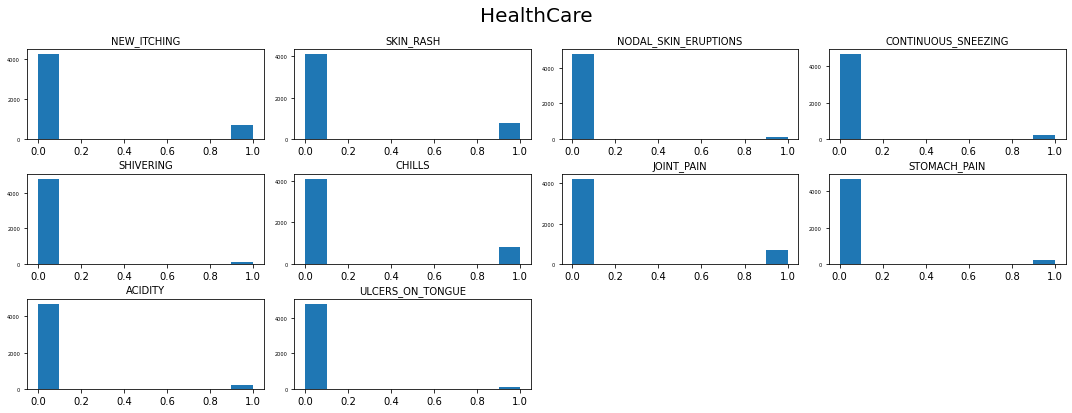

In [ ]:
#plotting histogram
fig=plt.figure(figsize=(15,6))
st=fig.suptitle("HealthCare",fontsize=20)
for col, num in zip(df.toPandas().describe().columns,range(1,11)):
  ax=fig.add_subplot(3,4, num)
  ax.hist(df.toPandas()[col])
  plt.xticks(fontsize=10)
  plt.yticks(fontsize=5)
  plt.title(col.upper(),fontsize=10)
plt.tight_layout()
st.set_y(0.95)
fig.subplots_adjust(top=0.85,hspace=0.4)
plt.show()  
